# **Stroke Prediction Analysis**

**Created on: February 22, 2025**

**Description: This script performs an exploratory data analysis and predictive modeling for stroke prediction using a healthcare dataset**.


**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline

**Load Data**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Stroke Prediction Dataset/healthcare-dataset-stroke-data.csv")

**Data Preprocessing**

In [4]:
print("Initial Data Overview:")
print(df.head())
print("\nDataset Shape:", df.shape)

df = df.drop(columns='id')
print("\nData after dropping 'id' column:")
print(df.head())

Initial Data Overview:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Dataset Shape: (5110, 12)

Data 

# **Exploratory Data Analysis (EDA):**

**Categorical Features Analysis**

In [5]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                       'work_type', 'Residence_type', 'smoking_status', 'stroke']

print("\nUnique Values in Categorical Features:")
unique_values = {col: df[col].unique() for col in categorical_features}
for col, values in unique_values.items():
    print(f"{col}: {values}")


Unique Values in Categorical Features:
gender: ['Male' 'Female' 'Other']
hypertension: [0 1]
heart_disease: [1 0]
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke: [1 0]


**Data Quality Check**

In [6]:
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nData Types and Non-Null Counts:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())


Duplicate Rows: 0

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None

Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_t

**Target Variable Analysis**

In [7]:
y = df['stroke']
print("\nStroke Distribution (%):")
print(y.value_counts(normalize=True)*100)
fig = px.bar(x=y.value_counts().index, y=y.value_counts(), title="Stroke Distribution")
fig.show()


Stroke Distribution (%):
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


**Numerical Features Analysis**


Numerical Features Summary:
               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  4909.000000
mean     43.226614         106.147677    28.893237
std      22.612647          45.283560     7.854067
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.500000
50%      45.000000          91.885000    28.100000
75%      61.000000         114.090000    33.100000
max      82.000000         271.740000    97.600000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

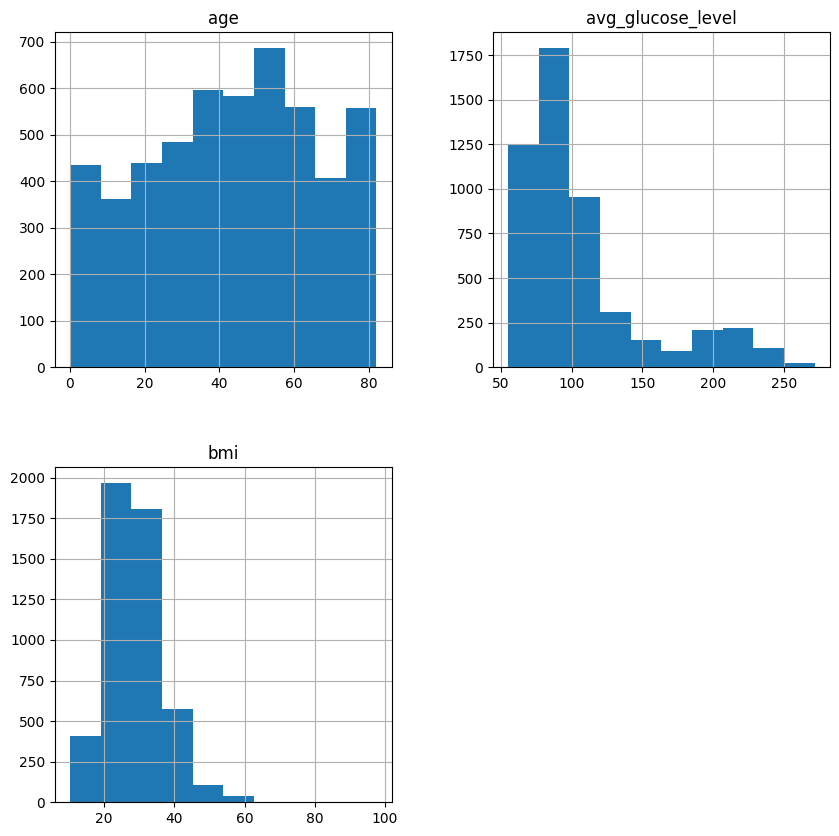

In [8]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
print("\nNumerical Features Summary:")
print(df[numerical_features].describe())
df[numerical_features].hist(figsize=(10, 10))

# **Feature-wise Stroke Analysis:**

**Gender**

In [9]:
fig = px.histogram(df, x='gender', width=400, title="Gender Distribution")
fig.show()
print("\nStroke Rate by Gender:")
print("Male:", round(df[df['gender'] == 'Male']['stroke'].mean()*100, 2), "%")
print("Female:", round(df[df['gender'] == 'Female']['stroke'].mean()*100, 2), "%")


Stroke Rate by Gender:
Male: 5.11 %
Female: 4.71 %


**Hypertension**

In [10]:
fig = px.histogram(df, x='hypertension', width=400, title="Hypertension Distribution")
fig.show()
print("\nStroke Rate by Hypertension:")
print("With Hypertension:", round(df[df['hypertension'] == 1]['stroke'].mean()*100, 2), "%")
print("Without Hypertension:", round(df[df['hypertension'] == 0]['stroke'].mean()*100, 2), "%")


Stroke Rate by Hypertension:
With Hypertension: 13.25 %
Without Hypertension: 3.97 %


**Heart Disease**

In [11]:
fig = px.histogram(df, x='heart_disease', width=400, title="Heart Disease Distribution")
fig.show()
print("\nStroke Rate without Heart Disease:",
      round(df[df['heart_disease'] == 0]['stroke'].mean()*100, 2), "%")


Stroke Rate without Heart Disease: 4.18 %


**Marital Status**

In [12]:
fig = px.histogram(df, x='ever_married', width=400, title="Marital Status Distribution")
fig.show()
print("\nStroke Rate for Married:",
      round(df[df['ever_married'] == 'Yes']['stroke'].mean()*100, 2), "%")


Stroke Rate for Married: 6.56 %


**Work Type**

In [13]:
fig = px.histogram(df, x='work_type', width=400, title="Work Type Distribution")
fig.show()
print("\nStroke Percentages by Work Type:")
print(df.groupby('work_type')['stroke'].mean() * 100)


Stroke Percentages by Work Type:
work_type
Govt_job         5.022831
Never_worked     0.000000
Private          5.094017
Self-employed    7.936508
children         0.291121
Name: stroke, dtype: float64


**Residence Type**

In [14]:
fig = px.histogram(df, x='Residence_type', width=400, title="Residence Type Distribution")
fig.show()
print("\nStroke Percentages by Residence Type:")
print(df.groupby('Residence_type')['stroke'].mean() * 100)


Stroke Percentages by Residence Type:
Residence_type
Rural    4.534606
Urban    5.200308
Name: stroke, dtype: float64


**Smoking Status**

In [15]:
fig = px.histogram(df, x='smoking_status', width=400, title="Smoking Status Distribution")
fig.show()
print("\nStroke Percentages by Smoking Status:")
print(df.groupby('smoking_status')['stroke'].mean() * 100)


Stroke Percentages by Smoking Status:
smoking_status
Unknown            3.044041
formerly smoked    7.909605
never smoked       4.756871
smokes             5.323194
Name: stroke, dtype: float64


# **Feature Importance**

In [16]:
print("\nMutual Information Scores with Stroke:")
for col in categorical_features[:-1]:  # Exclude target 'stroke'
    mi = mutual_info_score(df[col], df['stroke'])
    print(f"{col}: {mi:.2f}")


Mutual Information Scores with Stroke:
gender: 0.00
hypertension: 0.01
heart_disease: 0.01
ever_married: 0.01
work_type: 0.01
Residence_type: 0.00
smoking_status: 0.00


# **Correlation Analysis**

In [17]:
print("\nCorrelation Matrix:")
print(df[numerical_features + ['stroke']].corr())


Correlation Matrix:
                        age  avg_glucose_level       bmi    stroke
age                1.000000           0.238171  0.333398  0.245257
avg_glucose_level  0.238171           1.000000  0.175502  0.131945
bmi                0.333398           0.175502  1.000000  0.042374
stroke             0.245257           0.131945  0.042374  1.000000


# **Key Insights**

In [18]:
print("""
Key Findings:
1. Weak positive relationship (0.25) between age and stroke
2. Slight difference in avg. glucose levels between stroke/no stroke
3. BMI shows no significant relation to stroke
4. Hypertension increases stroke risk by 3.3x
5. Males slightly more likely to have stroke than females
6. Heart disease increases stroke risk by 4.07x
7. Married individuals 5.7x more likely to have stroke
8. Self-employed individuals have higher stroke probability
9. Rural residents slightly more likely to have stroke
10. Little difference in stroke risk between smokers and non-smokers
""")


Key Findings:
1. Weak positive relationship (0.25) between age and stroke
2. Slight difference in avg. glucose levels between stroke/no stroke
3. BMI shows no significant relation to stroke
4. Hypertension increases stroke risk by 3.3x
5. Males slightly more likely to have stroke than females
6. Heart disease increases stroke risk by 4.07x
7. Married individuals 5.7x more likely to have stroke
8. Self-employed individuals have higher stroke probability
9. Rural residents slightly more likely to have stroke
10. Little difference in stroke risk between smokers and non-smokers



# **Predictive Modeling**

**Define Features**

In [19]:
X = df.drop(columns='stroke')
y = df['stroke']
numerical = ['age', 'avg_glucose_level', 'bmi']
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
              'work_type', 'Residence_type', 'smoking_status']

**Preprocessing Pipeline**

In [20]:
transformer = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('power', PowerTransformer(method='yeo-johnson', standardize=True))
    ]), numerical),
    ('cat', OneHotEncoder(), categorical)
])

**Model Definitions**

In [21]:
def get_models():
    models, names = list(), list()
    models.append(LogisticRegression(solver='liblinear'))
    names.append('LR')
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    models.append(RandomForestClassifier(n_estimators=100))
    names.append('RF')
    return models, names

**Model Evaluation Function**

In [22]:
def evaluate_model(pipeline, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

**Model Training and Evaluation**

In [23]:
models, names = get_models()
results = list()

print("\nModel Performance (ROC-AUC):")
for i in range(len(models)):
    pipeline = imPipeline(steps=[
        ('transformer', transformer),
        ('smote', SMOTE()),
        ('model', models[i])
    ])

    scores = evaluate_model(pipeline, X, y)
    results.append(scores)
    print('>%s: ROC-AUC = %.3f (%.3f)' % (names[i], np.nanmean(scores), np.nanstd(scores)))


Model Performance (ROC-AUC):
>LR: ROC-AUC = 0.836 (0.030)
>LDA: ROC-AUC = 0.838 (0.031)
>RF: ROC-AUC = 0.782 (0.025)
